In [19]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Logistic Regression -> binary regression aasupmtions: dichotomous (binary) result: yes/no
# A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.
#  https://machinelearningmastery.com/logistic-regression-for-machine-learning/

In [20]:
df = pd.read_csv('data_url.csv')                                                                                 
url_df = np.array(df)                   # to convert into array   
random.shuffle(url_df)
#http://blog.christianperone.com/2011/09/machine-learning-text-feature-extraction-tf-idf-part-i/

In [21]:
df.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [22]:
import seaborn as sns

/home/suyash/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

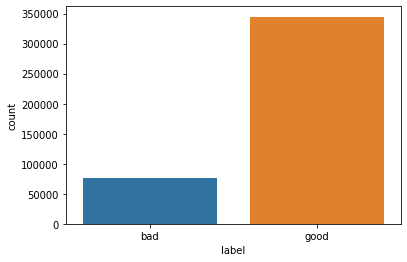

In [23]:
sns.countplot(df['label'])

Text(0.5, 0, 'Length of Url')

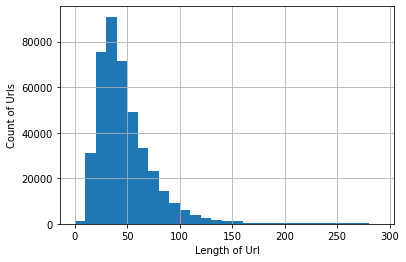

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
lens = df.url.str.len()
lens.hist(bins = np.arange(0,300,10))
plt.ylabel("Count of Urls")
plt.xlabel('Length of Url')

In [25]:
urls = df['url']                 # all labels
y =df['label']               # all urls corresponding to a label {G/B}

In [9]:
def sanitization(web):                      # tokenizing method
    web = web.lower()
    token = []
    dot_token_slash = []
    raw_slash = str(web).split('/')
    for i in raw_slash:
        raw1 = str(i).split('-')            # removing slash to get token
        slash_token = []
        for j in range(0,len(raw1)):
            raw2 = str(raw1[j]).split('.')  # removing dot to get the tokens
            slash_token = slash_token + raw2
        dot_token_slash = dot_token_slash + raw1 + slash_token # all tokens
    token = list(set(dot_token_slash))      # to remove same words  
    if 'com' in token:
        token.remove('com')                 # remove com
    return token

In [10]:
vectorizer = TfidfVectorizer(tokenizer=sanitization)  # term-frequency  no of times a word appears in document and inverse-document-frequency log(total words documents/occurence of the word in documents)
x = vectorizer.fit_transform(urls)



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
lgr = LogisticRegression()                  # Logistic regression
lgr.fit(x_train, y_train)
score = lgr.score(x_test, y_test)
print("score: {0:.2f} %".format(100 * score))

score: 98.55 %


/home/suyash/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
x_predict = ['hackthebox.eu','google.com/search=VAD3R','wikipedia.co.uk']
x_predict = vectorizer.transform(x_predict)
y_predict = lgr.predict(x_predict)
print (y_predict)

['bad' 'good' 'good']
